In [ ]:
# Code based on termpaper 2019 by Ashesh and Anders Høst

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df_merge = pd.read_pickle(r"C:\Users\ander\Documents\Data-Science\INF221\term_paper\data\benchmark_results_mergesort.pkl")
df_combined = pd.read_pickle(r"C:\Users\ander\Documents\Data-Science\INF221\term_paper\data\benchmark_results_combined_n100.pkl")
df_insertion = pd.read_pickle(r"C:\Users\ander\Documents\Data-Science\INF221\term_paper\data\benchmark_results_insertion.pkl")

In [46]:
sns.set(rc={"figure.figsize":(84/25.4,84/25.4)})
sns.set_style("whitegrid")

In [51]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
color = sns.color_palette("Set2", 6)

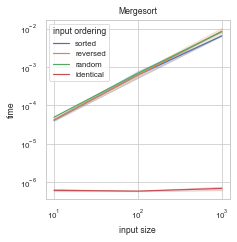

In [54]:
fig_merge = sns.lineplot(x="input size", y="time", data=df_merge, 
                         hue="input ordering")
plt.xscale("log")
plt.yscale("log")
plt.title('Mergesort')
fig_merge = fig_merge.get_figure()
#fig_merge.savefig("Mergesort.pdf")

In [17]:
# Concatenate

frames = [df_merge, df_combined, df_insertion]
df_all = pd.concat(frames, axis=0)

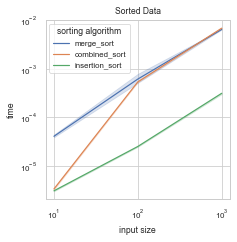

In [63]:
# Plot sorted

df_all_sorted = df_all[df_all["input ordering"] == "sorted"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_all_sorted)
plt.title("Sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()
fig_sorted.savefig("sorted_plot1000.pdf")

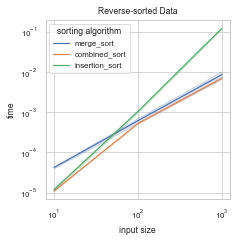

In [64]:
# Plot reversed

df_all_reversed = df_all[df_all["input ordering"] == "reversed"]
fig_reversed = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_reversed)
plt.title("Reverse-sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_reversed = fig_reversed.get_figure()
fig_reversed.savefig("reversed_plot1000.pdf")

PermissionError: [Errno 13] Permission denied: 'random_plot1000.pdf'

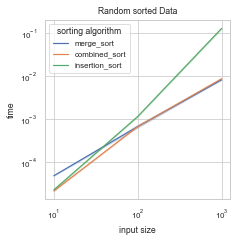

In [68]:
# Plot random

df_all_random = df_all[df_all["input ordering"] == "random"]
fig_random = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_random)
plt.title("Random sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_random = fig_random.get_figure()
fig_random.savefig("random_plot1000.pdf")